In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import linalg as LA

### Problem 1

In [41]:
d1 = np.genfromtxt('01-18train.csv',delimiter=',')
d1[:5,:]

array([[-0.16870724,  0.        ],
       [ 1.58280044,  1.        ],
       [ 1.2576642 ,  1.        ],
       [-2.66692079,  0.        ],
       [ 1.28179027,  1.        ]])

In [54]:
class0 = d1[d1[:,1] == 0, :1]
class1 = d1[d1[:,1] == 1, :1]

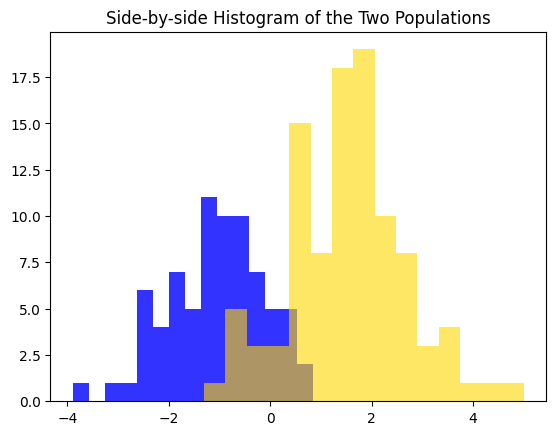

In [113]:
plt.hist(class0, color='b', alpha=0.8, bins=15)
plt.hist(class1, color='gold', alpha=0.6, bins=15)
plt.title("Side-by-side Histogram of the Two Populations")
plt.show()

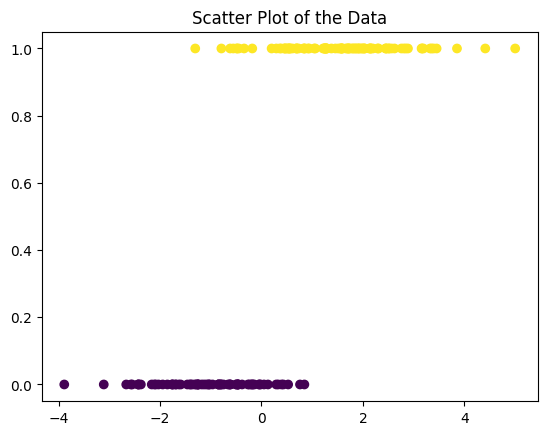

In [20]:
plt.scatter(d1[:,0], d1[:,1], c = d1[:,1])
plt.title("Scatter Plot of the Data")
plt.show()

In [29]:
class myBayes():
    def __init__(self):
        import scipy.stats as stats
        import numpy as np

    def fit(self, X, y):
        self.classes = np.unique(np.array(y)) # list of classes
        if (self.classes.min() != 0) | (self.classes.max() != self.classes.shape[0] - 1):
            return print("Classes must be np.array[0,...n]")
        self.py = np.bincount(y.astype('int8'))/y.size  # compute the priors P(y_k) for each class
        self.dists = []
        for i in np.unique(np.array(y)):
            thisx = X[y == i]
            thismean = np.mean(thisx, axis=0)
            thiscov = np.cov(thisx.T)
            self.dists.append(stats.multivariate_normal(thismean, thiscov))
        return self

    def predict(self,X):
        myprobs = []
        for i in range(self.classes.shape[0]):
            myprobs.append(self.py[i] * np.array(self.dists[i].pdf(np.array(X))))
        return  np.argmax(np.array(myprobs).T, axis=1)

In [182]:
X1=d1[:,0]
X1=np.reshape(X1, (-1,1))
y1=d1[:,1]
bModel = myBayes()
bModel.fit(X1,y1)
bModel.predict(X1)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [183]:
d2 = np.genfromtxt('01-18test.csv',delimiter=',')
d2[:5,:]

array([[ 1.7225845 ,  1.        ],
       [-0.58784964,  0.        ],
       [-2.17124438,  0.        ],
       [-0.42788664,  0.        ],
       [ 0.58050825,  1.        ]])

In [184]:
X2=d2[:,0]
X2=np.reshape(X2, (-1,1))
y2=d2[:,1]
bModel.predict(X2)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1])

In [185]:
print("Percentage of accurate prediction:", end=" ")
print(1-(np.count_nonzero(bModel.predict(X2)-y2)/np.shape(d2)[0]))

Percentage of accurate prediction: 0.9285714285714286


### Problem 2

In [95]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    def findweights(self):
        # print("Weight:", end=" ")
        # print(self.w_)
        # print("Bias:", end=" ")
        # print(self.b_)
        return self.w_, self.b_

In [186]:
lrModel = LogisticRegressionGD(0.1, 175, 1)
lrModel.fit(X1,y1)
lrModel.predict(X2)
print("Number of innacuracies", end=" ")
print(np.count_nonzero(lrModel.predict(X2)-y2))
print("Percentage of inaccurate prediction:", end=" ")
print(np.count_nonzero(lrModel.predict(X2)-y2)/np.shape(d2)[0])
print("Percentage of accurate prediction:", end=" ")
print(1-(np.count_nonzero(lrModel.predict(X2)-y2)/np.shape(d2)[0]))

Number of innacuracies 6
Percentage of inaccurate prediction: 0.08571428571428572
Percentage of accurate prediction: 0.9142857142857143


In [187]:
lrModel.findweights()

(array([1.9321795]), -0.04613153387967392)

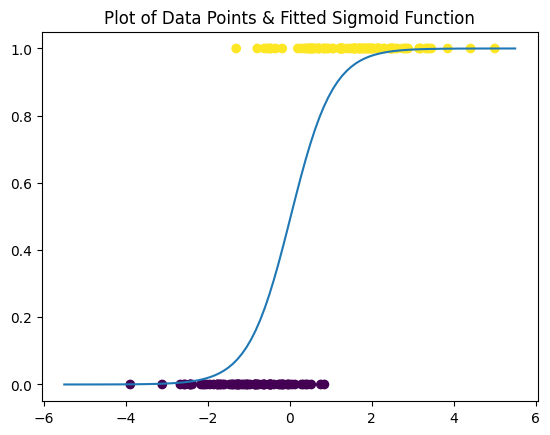

In [198]:
x=np.reshape(np.linspace(-5.5, 5.5, 100), (-1,1)) 
plt.scatter(d1[:,0], d1[:,1], c = d1[:,1])
plt.plot(x, lrModel.activation(lrModel.net_input(x)))
# ax = plt.gca()
# ax.set_aspect(5)
plt.title("Plot of Data Points & Fitted Sigmoid Function")
plt.show()

### Problem 3

In [7]:
def myKNN(X, y, pt, k):
    k_smallest = np.argpartition(LA.norm(pt - X, axis=1), k)
    indices = k_smallest[:k]
    y_values = y[indices].astype(int)
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.scatter(pt[0], pt[1], c="red")
    plt.show()
    return np.argmax(np.bincount(y_values))

In [5]:
d3 = np.genfromtxt('01-19data.csv',delimiter=',')
d3[:5,:]

array([[ 5.24607175,  1.03490857,  1.        ],
       [-5.05241673, -0.2116077 ,  0.        ],
       [-0.9571638 ,  1.75115351,  1.        ],
       [-2.4209439 , -1.60546925,  0.        ],
       [-0.53618997, -1.02552156,  0.        ]])

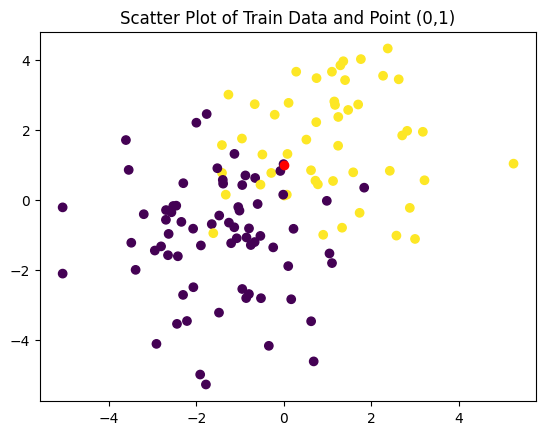

Point (0,1) belongs to class  1


In [9]:
X3=d3[:,:2]
y3=d3[:,2]
mypoint=np.array([0,1])
plt.title("Scatter Plot of Train Data and Point (0,1)")
print("Point (0,1) belongs to class ", myKNN(X3, y3, mypoint, 5))